<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_09/Module_9_Activity_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9 Activity Complete

* Colab - get notebook from gitmystuff DTSC5502 repository
* Save a Copy in Drive
* Remove Copy of
* Submit in Canvas

by Your Name

## Overview

* Binary Logistic Regression
* Categorical Encoding (One Hot Encoding.ipynb)
* Cross Validation
* Grid Search
* Pipeline: https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb
* Classification Report
* Precision / Recall
* Classification Comparisons (Classification Models Comparison.ipyny)
* Pandas (read_html)
* Regular Expressions

Sources

* https://towardsdatascience.com/powerful-one-liners-in-pandas-every-data-scientist-should-know-737e721b81b6
* https://www.quora.com/What-kind-of-statistics-should-be-learned-to-make-a-good-data-analyst
* https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1
* https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f
* https://www.encyclopedia-titanica.org/
* https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html
* https://github.com/davidjamesknight/SQLite_databases_for_learning_data_science
* the Titanic dataset is from https://data.world/datasets/titanic-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get database
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a3f1eG7XomCY8NdU2MVKFTmhpZc1fV3O' -O titanic.db

In [ ]:
import sqlite3
import pandas as pd

path = '/content/titanic.db'
db_connection = sqlite3.connect(path)

titanic = pd.read_sql_query('SELECT * FROM titanic', db_connection)
# titanic = titanic.sample(frac=1, axis=1).reset_index(drop=True)
titanic.drop('id', axis=1, inplace=True)
titanic.head()

Verify Module 9 Activity.ipynb and titanic.db are in the Colab Notebooks folder

## Linear Regression

Linear Regression:
* $y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$
* $y = \theta^T X$

## Binary Logistic Regression (Linear Classification)

See Notebook

* $y = {\large\sigma}(\theta^T X)$
* $p(y=1|\theta^T X) = \Large\frac{1}{1 + e^{-(\theta^T X)}}$

### Odds

* Odds (of success) provide a measure of the **likelihood of a particular outcome**. They are calculated as the ratio of the number of events that produce that outcome to the number that do not
* Odds = $\frac{p}{1-p}$
* In statistics, odds are an expression of relative possibilities, the odds in favor of an event, the ratio of the probability that the event will happen vs the probability that the event won't happen
* Odds are positive so we have a range of 0,  +∞
  so we use log

In [ ]:
# https://www.statisticshowto.com/log-odds/
import pandas as pd
import math

print('Defining odds based on a probability represented by a decimals')
print(f'Example: .1 / .9 = {.1/.9}')
d = {'Probs': [.1, .2, .3, .4, .5, .6, .7, .8, .9]}
probs = pd.DataFrame(d)
probs['Odds'] = probs['Probs']/(1 - probs['Probs'])
probs.head(9)

Defining odds based on a probability represented by a decimals
Example: .1 / .9 = 0.11111111111111112


,Probs,Odds
0,0.1,0.111111
1,0.2,0.250000
2,0.3,0.428571
3,0.4,0.666667
4,0.5,1.000000
5,0.6,1.500000
6,0.7,2.333333
7,0.8,4.000000
8,0.9,9.000000


### Log Odds

We use the log of odds so that we can get to $(-\infty, +\infty)$

In [ ]:
# add log odds to our probs dataframe
probs['Log Odds'] = probs['Odds'].apply(lambda x: math.log(x))
probs.head(9)

,Probs,Odds,Log Odds
0,0.1,0.111111,-2.197225
1,0.2,0.250000,-1.386294
2,0.3,0.428571,-0.847298
3,0.4,0.666667,-0.405465
4,0.5,1.000000,0.000000
5,0.6,1.500000,0.405465
6,0.7,2.333333,0.847298
7,0.8,4.000000,1.386294
8,0.9,9.000000,2.197225


### Sigmoid Functions

* The S Curve is a pattern of growth in which, in a new environment, the population density of an organism increases slowly initially, in a positive acceleration phase; then increases rapidly, approaching an exponential growth rate; but then declines in a negative acceleration phase until at zero growth rate the population stabilizes or is saturated
* Bounded, differentiable, real function, non-negative derivative at each point, exactly on inflection point
* A Sigmoid function example using the Logistic function: $f(x) = \frac{1}{1+e^{-x}}$

## Make Classification

https://www.sharpsightlabs.com/blog/sklearn-make_classification/

,X1,X2,Class
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1


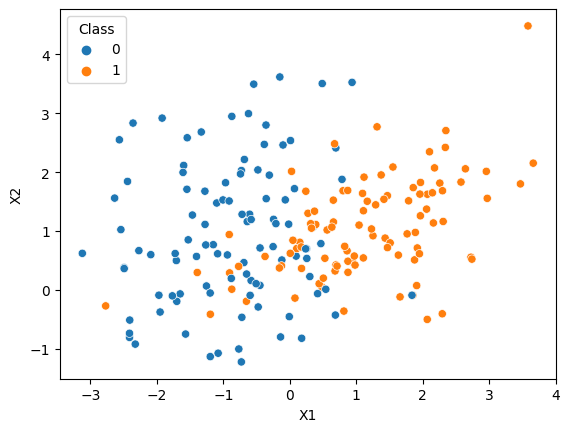

In [ ]:
# create some data
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification

# unpack features and class
X, binary_class = make_classification(n_samples=200,
                                             n_features=2,
                                             n_informative=2,
                                             n_redundant=0,
                                             n_clusters_per_class=1,
                                             random_state=42)



# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(X)
df.columns = ['X1', 'X2']
df['Class'] = binary_class
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Class'])
# plt.legend()
df.head()

In [ ]:
# get model coefficients
from statsmodels.formula.api import logit

# Class given (~) X1 and X2
model = logit(formula='Class ~ X1 + X2', data=df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.365923
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.4721
Time:                        15:57:41   Log-Likelihood:                -73.185
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 3.782e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2193      0.283      0.775      0.438      -0.335       0.774
X1             1.9472      0.

### Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

* $p(y=1|\theta^T X) = \Large\frac{1}{1 + e^{-(\theta^T X)}}$
* or $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}}}$
* $p = \large{\frac{1}{1 + e^{-(x)}}}$

* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.m.wikipedia.org/wiki/Logistic_function

In [ ]:
# create logistic function
import numpy as np

print(model.params)
def l_func(row):
    b0 = model.params.Intercept
    b1 = model.params.X1
    b2 = model.params.X2

    x1 = row['X1']
    x2 = row['X2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

Intercept    0.219251
X1           1.947225
X2          -0.458094
dtype: float64


In [ ]:
# create probabilities
df['probs'] = df.apply(l_func, axis=1)
df.head()

,X1,X2,Class,probs
0,-0.872929,0.013042,1,0.184446
1,1.312935,2.770534,1,0.818567
2,2.340428,2.420996,1,0.975097
3,2.294548,-0.404380,1,0.992404
4,0.944105,0.477241,1,0.862832


In [ ]:
# odds
df['odds'] = df['probs']/(1-df['probs'])
df.head()

,X1,X2,Class,probs,odds
0,-0.872929,0.013042,1,0.184446,0.226160
1,1.312935,2.770534,1,0.818567,4.511666
2,2.340428,2.420996,1,0.975097,39.155822
3,2.294548,-0.404380,1,0.992404,130.646711
4,0.944105,0.477241,1,0.862832,6.290342


In [ ]:
# log odds
import math

df['log odds'] = df['odds'].apply(lambda x: math.log(x))
df.head()

,X1,X2,Class,probs,odds,log odds
0,-0.872929,0.013042,1,0.184446,0.226160,-1.486513
1,1.312935,2.770534,1,0.818567,4.511666,1.506667
2,2.340428,2.420996,1,0.975097,39.155822,3.667549
3,2.294548,-0.404380,1,0.992404,130.646711,4.872497
4,0.944105,0.477241,1,0.862832,6.290342,1.839015


In [ ]:
# solve for y
def y_func(row):
    b0 = model.params.Intercept
    b1 = model.params.X1
    b2 = model.params.X2

    x1 = row['X1']
    x2 = row['X2']

    return b0+(b1*x1)+(b2*x2)

df['y'] = df.apply(y_func, axis=1)
df.head()

,X1,X2,Class,probs,odds,log odds,y
0,-0.872929,0.013042,1,0.184446,0.226160,-1.486513,-1.486513
1,1.312935,2.770534,1,0.818567,4.511666,1.506667,1.506667
2,2.340428,2.420996,1,0.975097,39.155822,3.667549,3.667549
3,2.294548,-0.404380,1,0.992404,130.646711,4.872497,4.872497
4,0.944105,0.477241,1,0.862832,6.290342,1.839015,1.839015


In [ ]:
import math

df['e'] = df['y'].apply(lambda y: 1/(1+math.exp(-y)))
df['l'] = df['probs'].apply(lambda p: math.log(p/(1-p)))
df.head()

,X1,X2,Class,probs,odds,log odds,y,e,l
0,-0.872929,0.013042,1,0.184446,0.226160,-1.486513,-1.486513,0.184446,-1.486513
1,1.312935,2.770534,1,0.818567,4.511666,1.506667,1.506667,0.818567,1.506667
2,2.340428,2.420996,1,0.975097,39.155822,3.667549,3.667549,0.975097,3.667549
3,2.294548,-0.404380,1,0.992404,130.646711,4.872497,4.872497,0.992404,4.872497
4,0.944105,0.477241,1,0.862832,6.290342,1.839015,1.839015,0.862832,1.839015


### Logit

A Logit function, the inverse of the logistic sigmoid, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity.

* https://deepai.org/machine-learning-glossary-and-terms/logit
* https://en.m.wikipedia.org/wiki/Logit

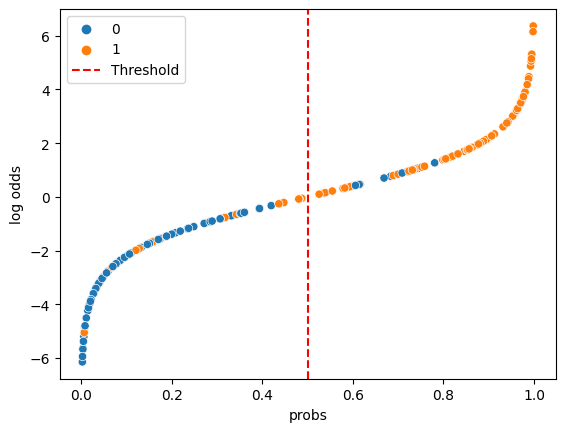

In [ ]:
# logit curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['probs'], y=df['log odds'], hue=df['Class'])
plt.axvline(x=.5, color='red', linestyle='dashed', label='Threshold')
plt.legend();

### Logit vs Sigmoid

The inverse of the logit curve is the inverse-logit or sigmoid function. The sigmoid function transforms the numbers (-∞ to +∞) back to values between 0 and 1.

* https://ajaytech.co/python-logistic-regression/

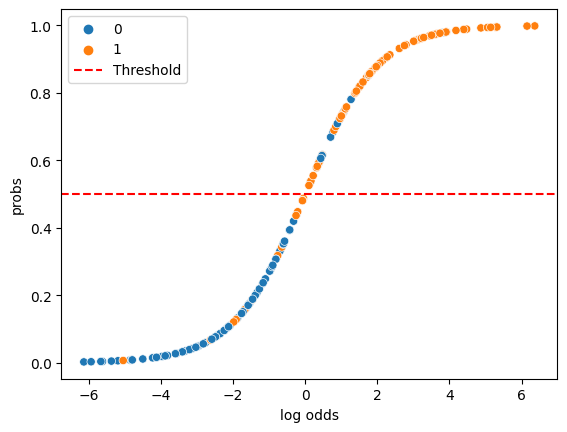

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['log odds'], y=df['probs'], hue=df['Class'])
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.legend();

### Conclusion

Exponential growth increases without bound. The effect of this limiting upper bound is a curve that grows exponentially at first and then slows down and hardly grows at all.  This type of growth is called logistic growth. The logistic function transforms the log odds to the actual probability.


* Logistic regression algorithm: $f(x) = \large{\frac{1}{1 + e^{-(x)}}}$
* The inflection point is met at the threshold
* 1 in the numerator is the limit of logistic growth (the carrying capacity)
* where (x) = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$
* 1 / 1 + $e^-(x)$ is always between 0 and 1
* $e$ is Euler's number, the base of natural logarithms
* Logarithms make it convenient to express large numbers and adding and subtracting logarithms is equivalent to multiplication and division
* for $y = x^n$ then $x=\sqrt[n]{y}$ and $n=log_x y$
* $\sigma(x) = 1/(1 + e^{-x})$
* logit is the inverse of the standard logistic function
* $logit(p) = \sigma^{-1}(p)$
* $logit(p) = log(p/(1-p))$ (log odds)
* $logit(p) = 1 / (1+exp(-x))$
* $log((p/1-p)) = \beta_0 + \beta_1X_1 + \beta_2X_2$

### Reflections on Binary Linear Classification

# The Titanic

## Get Data

In [ ]:
import sqlite3
import pandas as pd

db_connection = sqlite3.connect('/content/drive/MyDrive/DTSC5502/Module 09/titanic.db')

titanic = pd.read_sql_query('SELECT * FROM titanic', db_connection)
# titanic = titanic.sample(frac=1, axis=1).reset_index(drop=True)
titanic.drop('id', axis=1, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# print shape and info
print(titanic.shape)
print(titanic.info())

(1310, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


In [ ]:
# sample
titanic.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
934,3.0,1.0,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0.0,2.0,315153,22.025,None,S,2,NaN,None
243,1.0,0.0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0.0,0.0,PC 17585,79.200,None,C,None,16.0,"New York, NY"
1236,3.0,1.0,"Svensson, Mr. Johan Cervin",male,14.0,0.0,0.0,7538,9.225,None,S,13,NaN,None
330,2.0,0.0,"Ashby, Mr. John",male,57.0,0.0,0.0,244346,13.000,None,S,None,NaN,"West Hoboken, NJ"
343,2.0,1.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.000,D56,S,13,NaN,London


## Data Prep

In [ ]:
# find nulls
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home_dest     565
dtype: int64

In [ ]:
# find index of blank row
titanic.index[titanic.isnull().all(1)]

Int64Index([1309], dtype='int64')

In [ ]:
titanic.loc[1309]

pclass        NaN
survived      NaN
name         None
sex          None
age           NaN
sibsp         NaN
parch         NaN
ticket       None
fare          NaN
cabin        None
embarked     None
boat         None
body          NaN
home_dest    None
Name: 1309, dtype: object

In [ ]:
# delete row by index
titanic.drop(index=1309, inplace=True)

In [ ]:
# find nulls
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [ ]:
# observation for missing fare
titanic[titanic.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,None,S,None,261.0,None


In [ ]:
# average 3rd class fare
titanic[titanic.pclass==3.0].fare.mean()

13.302888700564973

In [ ]:
# impute missing fare
titanic.fare.fillna(13, inplace=True)

In [ ]:
# observation for missing embarked
titanic[titanic.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,None,6,NaN,None
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [ ]:
titanic[titanic['name'].str.contains('Stone', na=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
275,1.0,1.0,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1.0,1.0,16966,134.5,E34,C,3,NaN,"Tuxedo Park, NY"
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [ ]:
titanic[titanic['cabin'] == 'B28']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,None,6,NaN,None
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [ ]:
# https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
titanic.embarked.fillna('S', inplace=True)

In [ ]:
# recheck null count
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home_dest     564
dtype: int64

In [ ]:
# feature with only one value

constant_features = [
    feat for feat in titanic.columns if len(titanic[feat].unique()) == 1
]

constant_features

[]

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in titanic.columns.sort_values():
    if (len(titanic[val].unique()) < 3):
        val_counts = titanic[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

male      0.644003
female    0.355997
Name: sex, dtype: float64
0.0    0.618029
1.0    0.381971
Name: survived, dtype: float64
quasi_consts []


In [ ]:
# duplicate rows
titanic[titanic.duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest


In [ ]:
# drop duplicate rows
titanic.drop_duplicates(inplace=True)

In [ ]:
# check of duplicate columns
duplicated_feat = []
for i in range(0, len(titanic.columns)):
    orig = titanic.columns[i]

    for dupe in titanic.columns[i + 1:]:
        if titanic[orig].equals(titanic[dupe]):
            duplicated_feat.append(dupe)

duplicated_feat

[]

In [ ]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home_dest     564
dtype: int64

In [ ]:
# work on replacing age
print('Mr.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Mr\.')].shape)
print('Dr.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Dr\.')].shape)
print('Ms.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Ms\.')].shape)
print('Mrs.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Mrs\.')].shape)
print('Miss', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Miss\.')].shape)
print('Master', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Master')].shape)

Mr. (176, 14)
Dr. (1, 14)
Ms. (1, 14)
Mrs. (27, 14)
Miss (50, 14)
Master (8, 14)


In [ ]:
# lookup Titanic Wikipedia
titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Dr\.')] # 46

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6,None,C,None,NaN,"Philadelphia, PA"


In [ ]:
titanic.at[40, 'age'] = 46

In [ ]:
# lookup Titanic Wikipedia
titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Ms\.')] # 21

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1076,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.75,None,Q,None,NaN,None


In [ ]:
titanic.at[1076, 'age'] = 21

In [ ]:
cond1 = titanic['name'].str.contains('Master')
titanic.loc[cond1,'age'] = titanic.loc[cond1,'age'].fillna(titanic.loc[cond1,'age'].mean())

cond2 = titanic['name'].str.contains('Miss\.')
titanic.loc[cond2,'age'] = titanic.loc[cond2,'age'].fillna(titanic.loc[cond2,'age'].mean())

cond3 = titanic['name'].str.contains('Mrs\.')
titanic.loc[cond3,'age'] = titanic.loc[cond3,'age'].fillna(titanic.loc[cond3,'age'].mean())

cond4 = titanic['name'].str.contains('Mr\.')
titanic.loc[cond4,'age'] = titanic.loc[cond4,'age'].fillna(titanic.loc[cond4,'age'].mean())

In [ ]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home_dest     564
dtype: int64

In [ ]:
# create adult male feature
import pandas as pd

def is_adult_male(row):
    if pd.isna(row['age']):
        return None
    if row['age'] > 15 and row['age'] < 81 and row['sex'] == 'male':
        return 1
    else:
        return 0

titanic['adult_male'] = titanic.apply(is_adult_male, axis=1)
titanic['adult_male'].value_counts(dropna=False)

1    776
0    533
Name: adult_male, dtype: int64

In [ ]:
# create embark_town
import pandas as pd

def set_embark_town(row):
    if pd.isna(row['age']):
        return None
    elif row['embarked'] == 'C':
        return 'Cherbourg'
    elif row['embarked'] == 'S':
        return 'Southampton'
    elif row['embarked'] == 'Q':
        return 'Queenstown'
    else:
        return None

titanic['embark_town'] = titanic.apply(set_embark_town, axis=1)
titanic['embark_town'].value_counts(dropna=False)

Southampton    916
Cherbourg      270
Queenstown     123
Name: embark_town, dtype: int64

## Exploratory Data Analysis

In [ ]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                titanic.drop(['survived'], axis=1),
                                titanic['survived'],
                                test_size=0.25,
                                random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(981, 15)
(328, 15)
      pclass                         name   sex   age  sibsp  parch    ticket  \
1139     3.0              Rekic, Mr. Tido  male  38.0    0.0    0.0    349249   
678      3.0         Boulos, Master. Akar  male   6.0    1.0    1.0      2678   
290      1.0            Taussig, Mr. Emil  male  52.0    1.0    1.0    110413   
285      1.0           Straus, Mr. Isidor  male  67.0    1.0    0.0  PC 17483   
1157     3.0  Rosblom, Mr. Viktor Richard  male  18.0    1.0    1.0    370129   

          fare    cabin embarked  boat  body       home_dest  adult_male  \
1139    7.8958     None        S  None   NaN            None           1   
678    15.2458     None        C  None   NaN  Syria Kent, ON           0   
290    79.6500      E67        S  None   NaN    New York, NY           1   
285   221.7792  C55 C57        S  None  96.0    New York, NY           1   
1157   20.2125     None        S  None   NaN            None           1   

      embark_town  
1139  Southampto

In [ ]:
X_train.describe()

,pclass,age,sibsp,parch,fare,body,adult_male
count,981.000000,981.000000,981.000000,981.000000,981.000000,93.000000,981.000000
mean,2.298675,29.497520,0.531091,0.391437,33.665379,161.709677,0.593272
std,0.838785,12.957128,1.066322,0.904461,52.467453,99.157383,0.491474
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,21.774207,0.000000,0.000000,7.925000,75.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,14.500000,165.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,31.275000,256.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


### Describe Include Object

In [ ]:
X_train.describe(include='object')

,name,sex,ticket,cabin,embarked,boat,home_dest,embark_town
count,981,981,981,219,981,349,554,981
unique,980,2,736,154,3,24,303,3
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S,13,"New York, NY",Southampton
freq,2,633,9,5,689,32,47,689


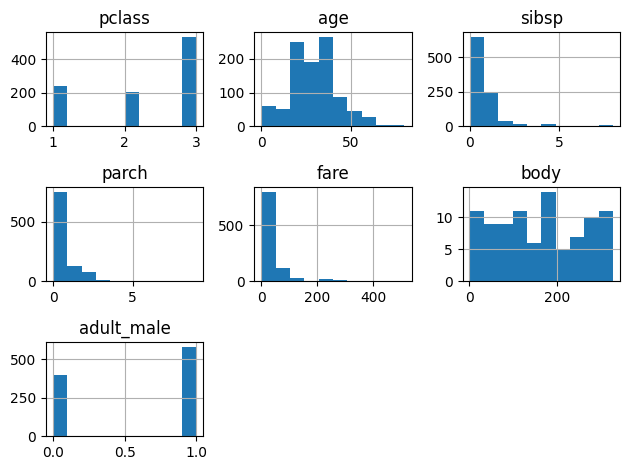

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

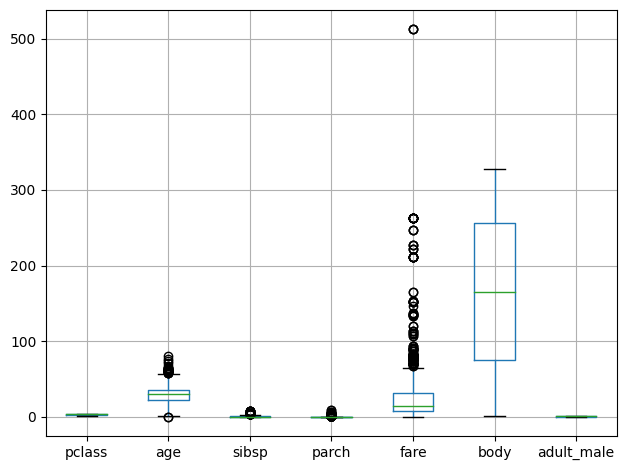

In [ ]:
X_train.boxplot()
plt.tight_layout();

### Outliers

In [ ]:
for feat in X_train._get_numeric_data().columns:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    if lower_count > 0 or upper_count > 0:
        print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

age outliers = 31: lower_fence: 0.0, upper_fence: 57.0, lower_count: 0, upper_count: 31
sibsp outliers = 46: lower_fence: -2.0, upper_fence: 2.0, lower_count: 0, upper_count: 46
parch outliers = 228: lower_fence: 0.0, upper_fence: 0.0, lower_count: 0, upper_count: 228
fare outliers = 129: lower_fence: -27.0, upper_fence: 66.0, lower_count: 0, upper_count: 129


<Axes: >

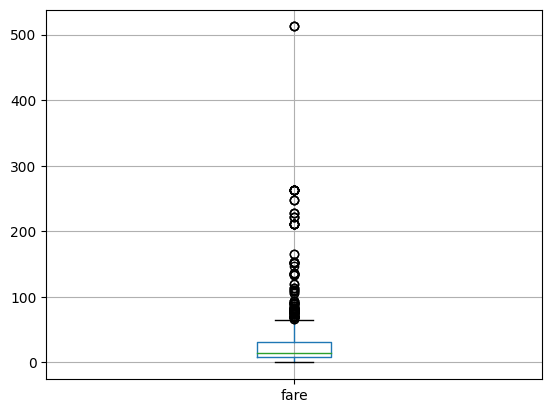

In [ ]:
# fare boxplot
X_train.boxplot(column=['fare'])

<Axes: xlabel='fare'>

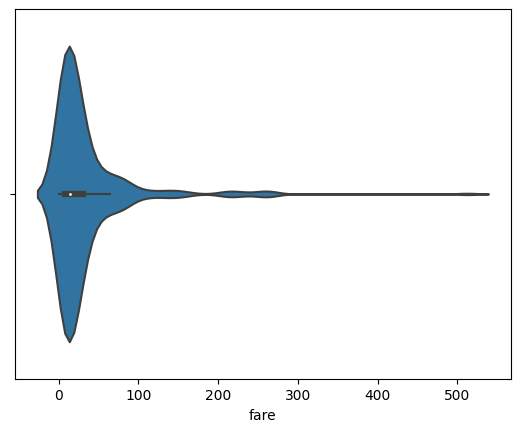

In [ ]:
# fare violinplot
import seaborn as sns

sns.violinplot(x=X_train['fare'])

### Handling Outliers

https://www.projectpro.io/recipes/deal-with-outliers-in-python

* Drop
* Mark
* Rescale

### Scalers

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

* from sklearn.preprocessing import MinMaxScaler
* from sklearn.preprocessing import minmax_scale
* from sklearn.preprocessing import MaxAbsScaler
* from sklearn.preprocessing import StandardScaler
* from sklearn.preprocessing import RobustScaler
* from sklearn.preprocessing import Normalizer
* from sklearn.preprocessing import QuantileTransformer
* from sklearn.preprocessing import PowerTransformer

In [ ]:
# PowerTransformer scaler for outliers
# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

feat_scales = ['fare']

scaler = MinMaxScaler()

for feat in feat_scales:
    X_train[feat] = scaler.fit_transform(X_train[feat].values.reshape(-1,1))

for feat in feat_scales:
    X_test[feat] = scaler.fit_transform(X_test[feat].values.reshape(-1,1))

In [ ]:
X_train.describe()

,pclass,age,sibsp,parch,fare,body,adult_male
count,981.000000,981.000000,981.000000,981.000000,981.000000,93.000000,981.000000
mean,2.298675,29.497520,0.531091,0.391437,0.065710,161.709677,0.593272
std,0.838785,12.957128,1.066322,0.904461,0.102410,99.157383,0.491474
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,21.774207,0.000000,0.000000,0.015469,75.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,0.028302,165.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,0.061045,256.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,1.000000,328.000000,1.000000


<Axes: >

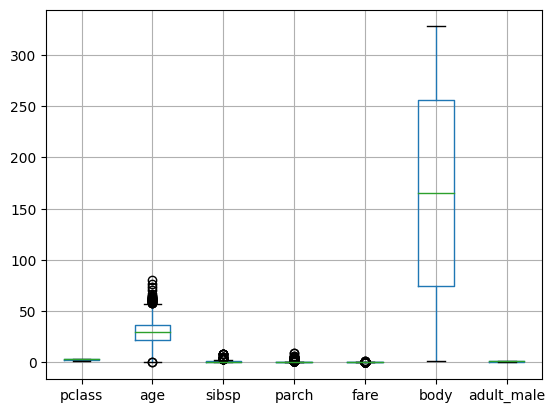

In [ ]:
# show X_train boxplots
X_train.boxplot()

### Some Feature Engineering for EDA

In [ ]:
# mapping female male
X_train['sex'] = X_train['sex'].map({'female':0,'male':1})
X_test['sex'] = X_test['sex'].map({'female':0,'male':1})
X_train['sex'].value_counts()

1    633
0    348
Name: sex, dtype: int64

In [ ]:
# reducing labels
import re

def cat_home(r):
    text = str(r['home_dest']).strip()
    if bool(re.search('[A-Z]{2}$', text[-2:])):
        return 'North America'
    elif text == 'nan':
        return 'Missing'
    else:
        return 'Not North America'

X_train['cat_home'] = X_train.apply(cat_home, axis=1)
X_test['cat_home'] = X_test.apply(cat_home, axis=1)

print(X_train['cat_home'].value_counts())
print()
print(X_test['cat_home'].value_counts())

Not North America    559
North America        422
Name: cat_home, dtype: int64

Not North America    185
North America        143
Name: cat_home, dtype: int64


In [ ]:
# check info for categorical features
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 1139 to 1126
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       981 non-null    float64
 1   name         981 non-null    object 
 2   sex          981 non-null    int64  
 3   age          981 non-null    float64
 4   sibsp        981 non-null    float64
 5   parch        981 non-null    float64
 6   ticket       981 non-null    object 
 7   fare         981 non-null    float64
 8   cabin        219 non-null    object 
 9   embarked     981 non-null    object 
 10  boat         349 non-null    object 
 11  body         93 non-null     float64
 12  home_dest    554 non-null    object 
 13  adult_male   981 non-null    int64  
 14  embark_town  981 non-null    object 
 15  cat_home     981 non-null    object 
dtypes: float64(6), int64(2), object(8)
memory usage: 130.3+ KB


In [ ]:
# start list of features we won't use for analysis
drop_features = ['name', 'ticket', 'cabin', 'boat', 'body', 'home_dest']

### Crosstab

In [ ]:
pd.crosstab(X_train['cat_home'], X_train['pclass'])

pclass,1.0,2.0,3.0
cat_home,,,
North America,170,127,125
Not North America,72,77,410


<Axes: xlabel='pclass', ylabel='cat_home'>

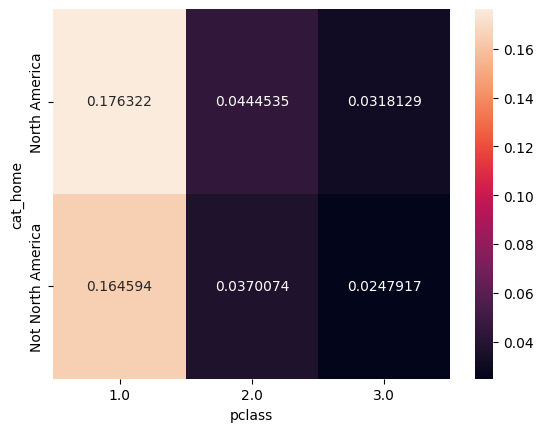

In [ ]:
import numpy as np
import seaborn as sns

result_crosstab = pd.crosstab(index = X_train['cat_home'],
                              columns=X_train['pclass'],
                              values =X_train['fare'],
                              aggfunc=np.mean)

sns.heatmap(result_crosstab, annot = True, fmt = 'g')

### Pivot Table

In [ ]:
pd.pivot_table(X_train,
               index=['cat_home'],
               columns=['pclass'],
               aggfunc='size',
               fill_value=0)

pclass,1.0,2.0,3.0
cat_home,,,
North America,170,127,125
Not North America,72,77,410


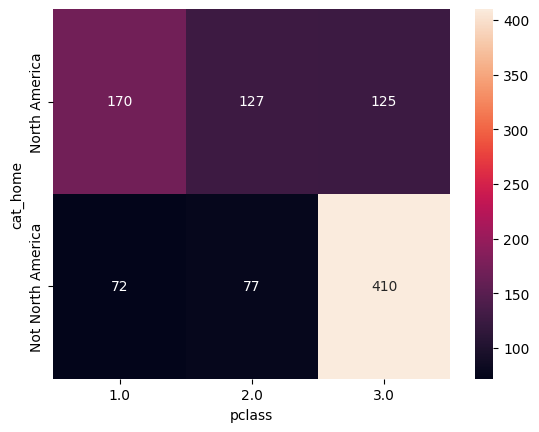

In [ ]:
result_pivot = pd.pivot_table(X_train,
                              index=['cat_home'],
                              columns=['pclass'],
                              aggfunc='size',
                              fill_value=0)

sns.heatmap(result_pivot, annot = True, fmt = 'g');

### Rug Plot

A plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

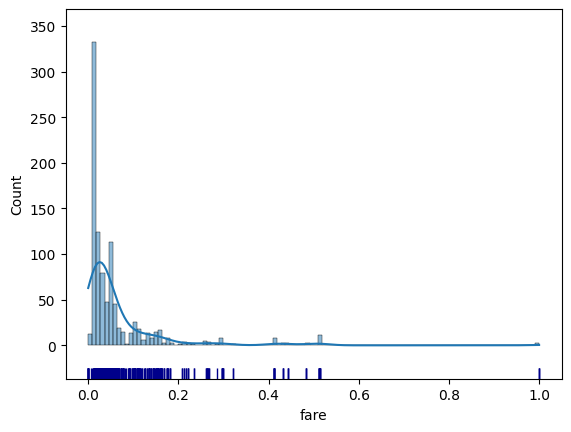

In [ ]:
sns.rugplot(x='fare', data=X_train, height=.03, color='darkblue')
sns.histplot(x='fare', data=X_train, kde=True);

### Strip Plot

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

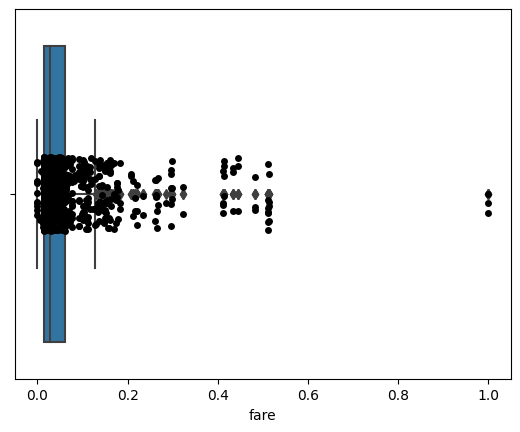

In [ ]:
ax = sns.stripplot(x=X_train['fare'], dodge=True, color='black')
sns.boxplot(data=X_train, x='fare', ax=ax);

### Count Plot

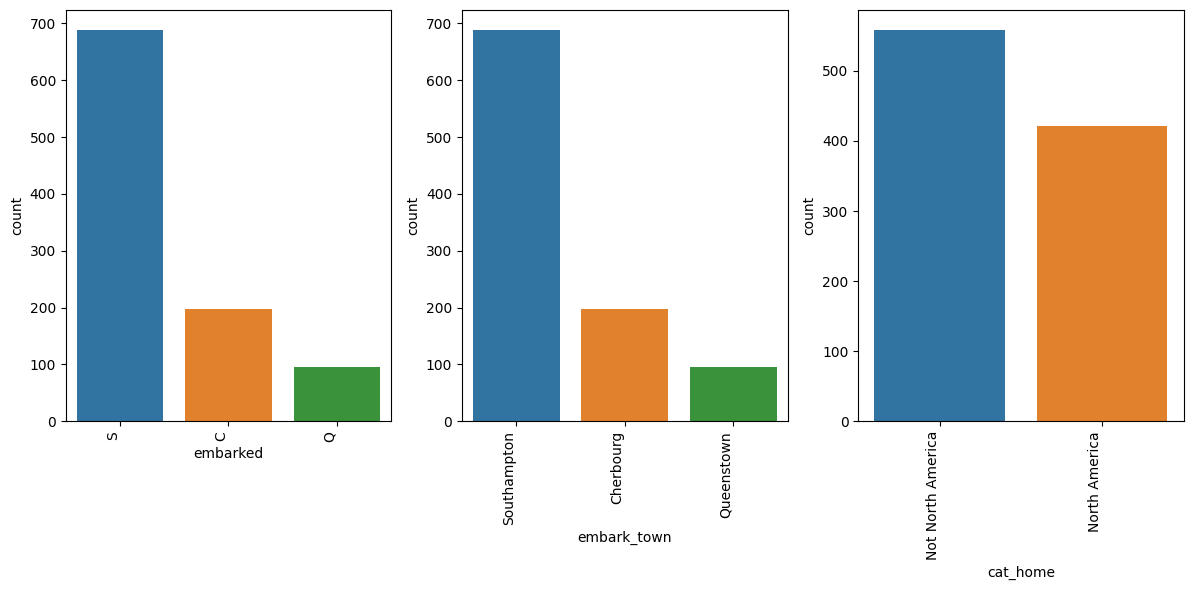

In [ ]:
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_cats = X_train.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 10]
for i, col in enumerate(cat_cols):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=X_train[col], ax=ax)
    plt.xticks(rotation=90, ha='right')

fig.tight_layout()
plt.show()

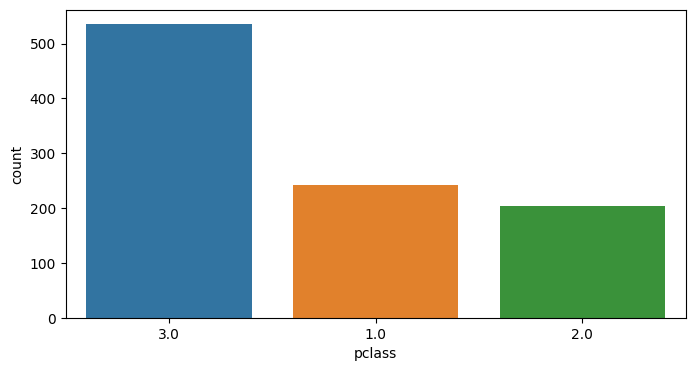

In [ ]:
# look at pclass counts
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=X_train.pclass, order=X_train.pclass.value_counts().index);

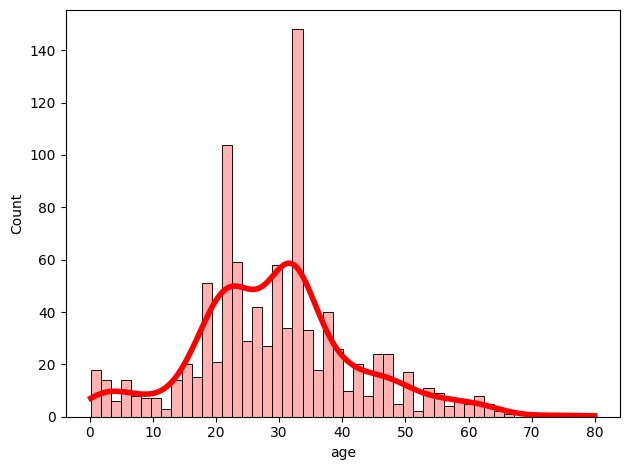

In [ ]:
# example of a histogram with kde
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X_train['age'], alpha=0.3, kde=True,
             bins=int(50), color = 'red',
             line_kws={'linewidth': 4})

plt.tight_layout()
plt.show();

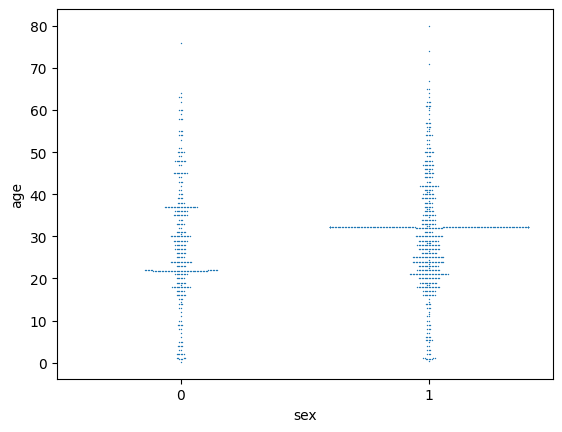

In [ ]:
# an interesting way to view sex and age .map({'female':1,'male':0})
import seaborn as sns

sns.swarmplot(x='sex', y='age', data=X_train.drop(drop_features, axis=1)._get_numeric_data(), size=1);

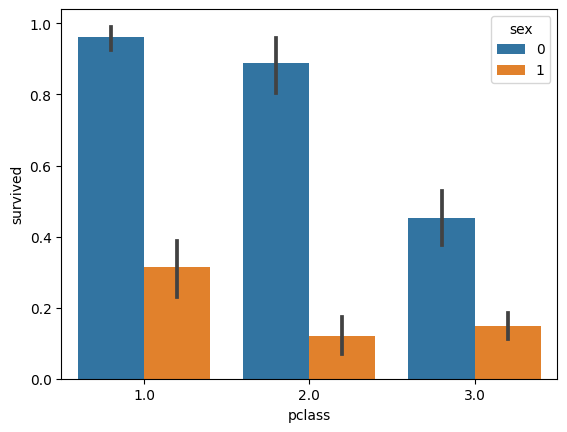

In [ ]:
# bar chart with 95% confidence intervals (error bars)
sns.barplot(x='pclass', y=y_train, hue='sex', data=X_train);

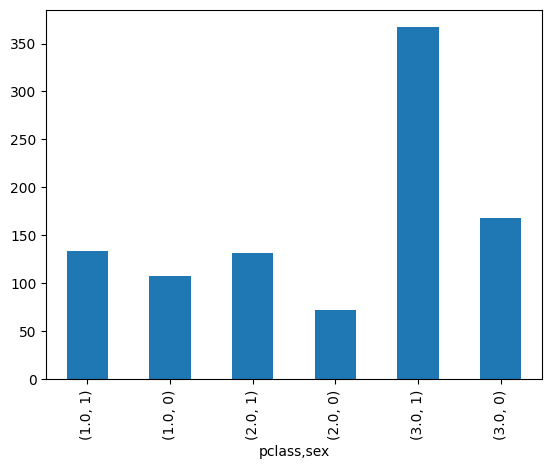

In [ ]:
# example of using groupby
X_train.groupby('pclass')['sex'].value_counts().plot(kind='bar');

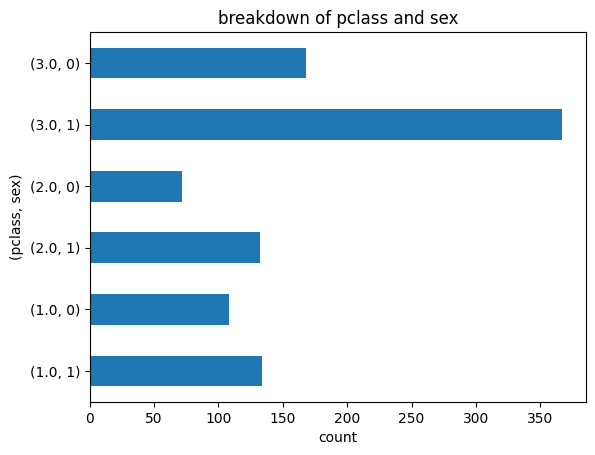

In [ ]:
X_train.groupby('pclass')['sex'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('(pclass, sex)')
plt.title('breakdown of pclass and sex')
plt.show()

## Groupbys

https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd

In [ ]:
# groupby data views
titanic.groupby(['pclass', 'embark_town']).size()

pclass  embark_town
1.0     Cherbourg      141
        Queenstown       3
        Southampton    179
2.0     Cherbourg       28
        Queenstown       7
        Southampton    242
3.0     Cherbourg      101
        Queenstown     113
        Southampton    495
dtype: int64

In [ ]:
# using aggregates
titanic.groupby('embark_town')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
embark_town,,,,
Cherbourg,4.0125,512.3292,62.336267,28.51875
Queenstown,6.7500,90.0000,12.409012,7.75000
Southampton,0.0000,263.0000,27.517889,13.00000


In [ ]:
# using aggregates
titanic.groupby('sex')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
sex,,,,
female,6.75,512.3292,46.198097,23.000
male,0.00,512.3292,26.138996,12.275


### nlargest

* n = 6
* data.nlargest(n, 'fare, keep = 'all')

In [ ]:
n = 6
X_train.nlargest(n, 'fare', keep='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,adult_male,embark_town,cat_home
183,1.0,"Lesurer, Mr. Gustave J",1,35.0,0.0,0.0,PC 17755,1.000000,B101,C,3,NaN,None,1,Cherbourg,Not North America
302,1.0,"Ward, Miss. Anna",0,35.0,0.0,0.0,PC 17755,1.000000,None,C,3,NaN,None,0,Cherbourg,Not North America
50,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.0,0.0,1.0,PC 17755,1.000000,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",0,Cherbourg,North America
111,1.0,"Fortune, Miss. Alice Elizabeth",0,24.0,3.0,2.0,19950,0.513342,C23 C25 C27,S,10,NaN,"Winnipeg, MB",0,Southampton,North America
114,1.0,"Fortune, Mr. Charles Alexander",1,19.0,3.0,2.0,19950,0.513342,C23 C25 C27,S,None,NaN,"Winnipeg, MB",1,Southampton,North America
116,1.0,"Fortune, Mrs. Mark (Mary McDougald)",0,60.0,1.0,4.0,19950,0.513342,C23 C25 C27,S,10,NaN,"Winnipeg, MB",0,Southampton,North America
112,1.0,"Fortune, Miss. Ethel Flora",0,28.0,3.0,2.0,19950,0.513342,C23 C25 C27,S,10,NaN,"Winnipeg, MB",0,Southampton,North America


### nsmallest

* n = 7
* data.nsmallest(n, 'fare', keep = 'all')

In [ ]:
n = 7
X_train.nsmallest(n, 'fare', keep='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,adult_male,embark_town,cat_home
581,2.0,"Watson, Mr. Ennis Hastings",1,32.252151,0.0,0.0,239856,0.0,None,S,None,NaN,Belfast,1,Southampton,Not North America
223,1.0,"Parr, Mr. William Henry Marsh",1,32.252151,0.0,0.0,112052,0.0,None,S,None,NaN,Belfast,1,Southampton,Not North America
7,1.0,"Andrews, Mr. Thomas Jr",1,39.000000,0.0,0.0,112050,0.0,A36,S,None,NaN,"Belfast, NI",1,Southampton,North America
898,3.0,"Johnson, Mr. William Cahoone Jr",1,19.000000,0.0,0.0,LINE,0.0,None,S,None,NaN,None,1,Southampton,Not North America
125,1.0,"Fry, Mr. Richard",1,32.252151,0.0,0.0,112058,0.0,B102,S,None,NaN,None,1,Southampton,Not North America
234,1.0,"Reuchlin, Jonkheer. John George",1,38.000000,0.0,0.0,19972,0.0,None,S,None,NaN,"Rotterdam, Netherlands",1,Southampton,Not North America
473,2.0,"Knight, Mr. Robert J",1,32.252151,0.0,0.0,239855,0.0,None,S,None,NaN,Belfast,1,Southampton,Not North America
896,3.0,"Johnson, Mr. Alfred",1,49.000000,0.0,0.0,LINE,0.0,None,S,None,NaN,None,1,Southampton,Not North America
150,1.0,"Harrison, Mr. William",1,40.000000,0.0,0.0,112059,0.0,B94,S,None,110.0,None,1,Southampton,Not North America
384,2.0,"Cunningham, Mr. Alfred Fleming",1,32.252151,0.0,0.0,239853,0.0,None,S,None,NaN,Belfast,1,Southampton,Not North America


In [ ]:
# groupby data views
titanic.groupby(['pclass', 'embarked']).size()

pclass  embarked
1.0     C           141
        Q             3
        S           179
2.0     C            28
        Q             7
        S           242
3.0     C           101
        Q           113
        S           495
dtype: int64

In [ ]:
for column in X_train.select_dtypes(include='object'):
    if X_train[column].nunique() < 10:
        display(X_train.groupby(column).mean())

# using aggregates
titanic.groupby('sex')['fare'].agg(['min', 'max', 'mean', 'median'])

<ipython-input-79-20c8551de445>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,pclass,sex,age,sibsp,parch,fare,body,adult_male
embarked,,,,,,,,
C,1.862944,0.573604,30.981173,0.416244,0.365482,0.123620,161.722222,0.522843
Q,2.894737,0.536842,28.088567,0.347368,0.136842,0.024078,197.000000,0.494737
S,2.341074,0.680697,29.267579,0.589260,0.433962,0.054893,159.185714,0.626996


<ipython-input-79-20c8551de445>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,pclass,sex,age,sibsp,parch,fare,body,adult_male
embark_town,,,,,,,,
Cherbourg,1.862944,0.573604,30.981173,0.416244,0.365482,0.123620,161.722222,0.522843
Queenstown,2.894737,0.536842,28.088567,0.347368,0.136842,0.024078,197.000000,0.494737
Southampton,2.341074,0.680697,29.267579,0.589260,0.433962,0.054893,159.185714,0.626996


<ipython-input-79-20c8551de445>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(X_train.groupby(column).mean())


,pclass,sex,age,sibsp,parch,fare,body,adult_male
cat_home,,,,,,,,
North America,1.893365,0.582938,30.735770,0.646919,0.545024,0.093832,159.368421,0.523697
Not North America,2.604651,0.692308,28.562741,0.443649,0.275492,0.044481,163.327273,0.645796


,min,max,mean,median
sex,,,,
female,6.75,512.3292,46.198097,23.000
male,0.00,512.3292,26.138996,12.275


## Correlation

In [ ]:
# show corr table
X_train.drop(drop_features, axis=1).corr(method='pearson')

<ipython-input-80-e4e9bfb2c8a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.drop(drop_features, axis=1).corr(method='pearson')


,pclass,sex,age,sibsp,parch,fare,adult_male
pclass,1.000000,0.111668,-0.351403,0.062052,0.043457,-0.557574,0.062306
sex,0.111668,1.000000,0.083373,-0.120309,-0.228100,-0.191252,0.895494
age,-0.351403,0.083373,1.000000,-0.234017,-0.141657,0.138633,0.267312
sibsp,0.062052,-0.120309,-0.234017,1.000000,0.360851,0.156296,-0.272777
parch,0.043457,-0.228100,-0.141657,0.360851,1.000000,0.207459,-0.327840
fare,-0.557574,-0.191252,0.138633,0.156296,0.207459,1.000000,-0.194408
adult_male,0.062306,0.895494,0.267312,-0.272777,-0.327840,-0.194408,1.000000


<ipython-input-81-8dc7e5d5f277>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.drop(drop_features, axis=1).corr(method='pearson')


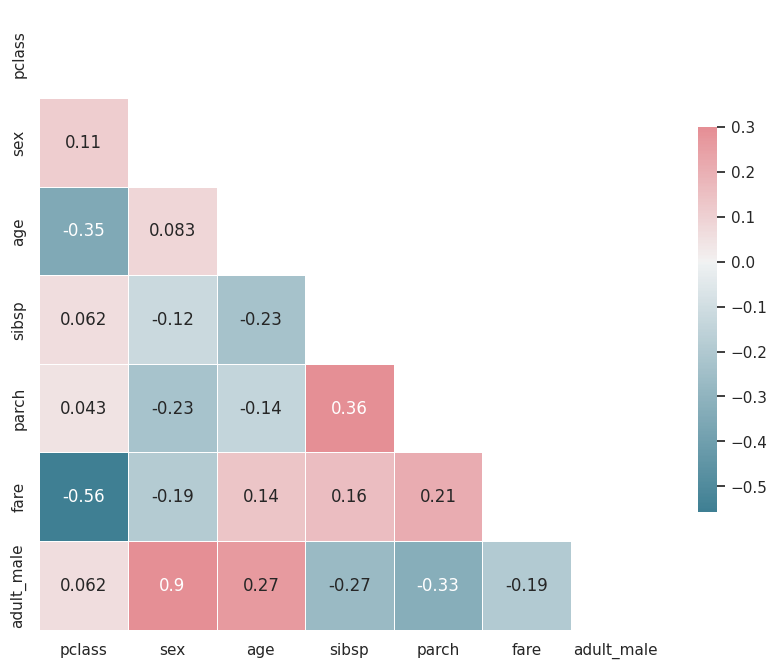

In [ ]:
# feature on feature
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.drop(drop_features, axis=1).corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Variance Inflation Factor

* Measures how much one predictor is influenced, or inflated, by the presence, or correlation, of another predictor
* Quick measure of the contribution of a predictor to the standard error, the standard deviation of a sample, in regression

https://www.statisticshowto.com/variance-inflation-factor/

In [ ]:
# vif
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_train = X_train.drop(drop_features, axis=1)._get_numeric_data()
vif_data = [variance_inflation_factor(vif_train.values, i) for i in range(len(vif_train.columns))]

d = {'feature': vif_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,pclass,4.575014
1,sex,16.656587
2,age,5.116539
3,sibsp,1.618910
4,parch,1.527735
5,fare,1.737231
6,adult_male,17.168924


In [ ]:
# add adult_male to features to drop and possibly fare
# for a list, we use append to add one item and extend to add multiple items
drop_features.extend(['adult_male', 'fare', 'embark_town'])

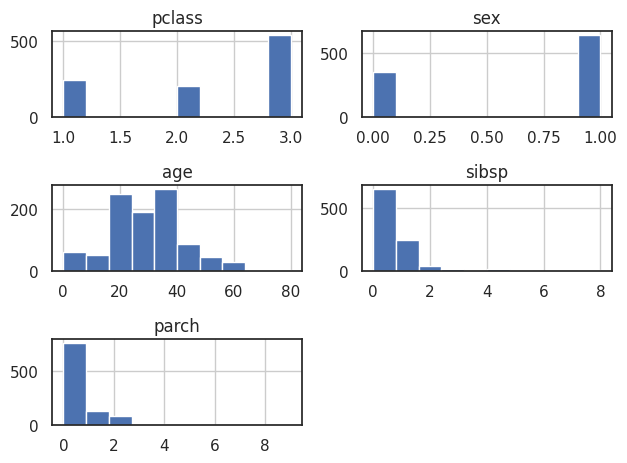

In [ ]:
import matplotlib.pyplot as plt

X_train.drop(drop_features, axis=1)._get_numeric_data().hist()
plt.tight_layout();

### Mutual Information

* Measures the mutual dependence on two variables
* Persons r is linear where as MI measures non-linear relationships
* How much information can be extracted from one variable by observing another variable

Text(0, 0.5, 'Mutual Information')

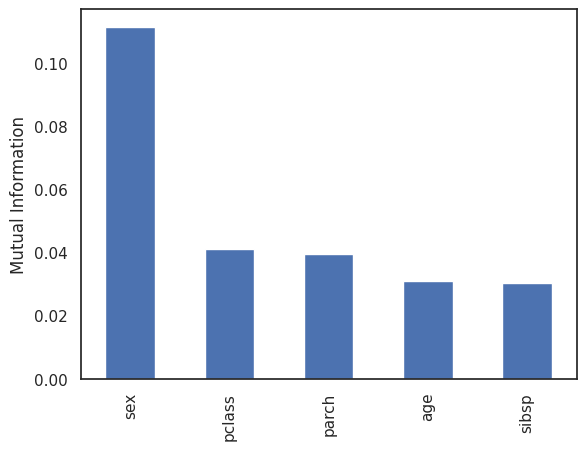

In [ ]:
# obtain the mutual information values and select features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

mi_train = X_train.drop(drop_features, axis=1)._get_numeric_data()

mi = mutual_info_regression(mi_train, y_train)
mi = pd.Series(mi)
mi.index = mi_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information')

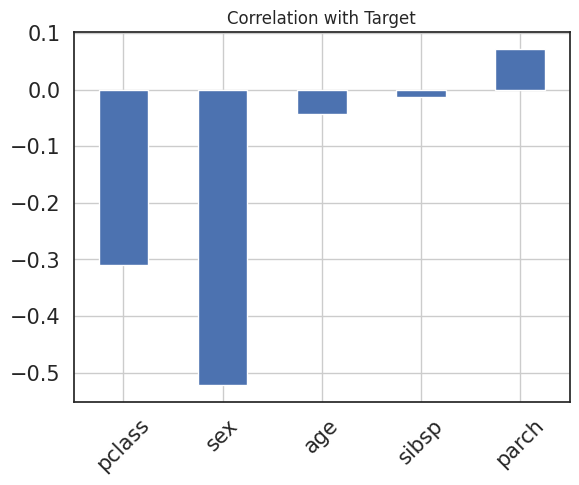

In [ ]:
# correlation anlaysis against our titanic target (survived)
X_train.drop(drop_features, axis=1)._get_numeric_data().corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard

## Feature Engineering

### Mapping Dependent Variable

* Label Encoder for labels in classification **target**
* Use LabelEncoder when there are only two possible values of a categorical **features**

### Multicollinearity

* Combine features with high multicollinearity
* Standardize both and then take the average of the two

### Bi Label Mapping

In [ ]:
# identify features with bi labels
bi_labels = []
for feat in X_train.columns.sort_values():
    if (len(X_train[feat].dropna().unique()) < 3):
        print(X_train[feat].value_counts())
        bi_labels.append(feat)

1    582
0    399
Name: adult_male, dtype: int64
Not North America    559
North America        422
Name: cat_home, dtype: int64
1    633
0    348
Name: sex, dtype: int64


In [ ]:
# bi-label mapping

for feat in bi_labels:
    print(X_train[feat].value_counts())
    bi0 = X_train[feat].value_counts().index[0]
    bi1 = X_train[feat].value_counts().index[1]
    X_train[feat] = X_train[feat].map({bi0:0,bi1:1})
    X_test[feat] = X_test[feat].map({bi0:0,bi1:1})

X_train.head()

1    582
0    399
Name: adult_male, dtype: int64
Not North America    559
North America        422
Name: cat_home, dtype: int64
1    633
0    348
Name: sex, dtype: int64


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,adult_male,embark_town,cat_home
1139,3.0,"Rekic, Mr. Tido",0,38.0,0.0,0.0,349249,0.015412,None,S,None,NaN,None,0,Southampton,0
678,3.0,"Boulos, Master. Akar",0,6.0,1.0,1.0,2678,0.029758,None,C,None,NaN,"Syria Kent, ON",1,Cherbourg,1
290,1.0,"Taussig, Mr. Emil",0,52.0,1.0,1.0,110413,0.155466,E67,S,None,NaN,"New York, NY",0,Southampton,1
285,1.0,"Straus, Mr. Isidor",0,67.0,1.0,0.0,PC 17483,0.432884,C55 C57,S,None,96.0,"New York, NY",0,Southampton,1
1157,3.0,"Rosblom, Mr. Viktor Richard",0,18.0,1.0,1.0,370129,0.039452,None,S,None,NaN,None,0,Southampton,0


### One Hot Encoding Alternatives

For features with many labels

* https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
* https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
* https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 (frequency and mean encoding)

In [ ]:
# reducing labels
import re

def get_state(r):
    text = str(r['home_dest']).strip()
    if bool(re.search('[A-Z]{2}$', text[-2:])):
        return text[-2:]
    elif text == 'nan':
        return 'NaN'
    else:
        return 'NNA'

X_train['state'] = X_train.apply(get_state, axis=1)
X_test['state'] = X_test.apply(get_state, axis=1)

print(len(X_train['state'].value_counts()))
X_train.head()

41


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,adult_male,embark_town,cat_home,state
1139,3.0,"Rekic, Mr. Tido",0,38.0,0.0,0.0,349249,0.015412,None,S,None,NaN,None,0,Southampton,0,NNA
678,3.0,"Boulos, Master. Akar",0,6.0,1.0,1.0,2678,0.029758,None,C,None,NaN,"Syria Kent, ON",1,Cherbourg,1,ON
290,1.0,"Taussig, Mr. Emil",0,52.0,1.0,1.0,110413,0.155466,E67,S,None,NaN,"New York, NY",0,Southampton,1,NY
285,1.0,"Straus, Mr. Isidor",0,67.0,1.0,0.0,PC 17483,0.432884,C55 C57,S,None,96.0,"New York, NY",0,Southampton,1,NY
1157,3.0,"Rosblom, Mr. Viktor Richard",0,18.0,1.0,1.0,370129,0.039452,None,S,None,NaN,None,0,Southampton,0,NNA


### Make Copies

In [ ]:
# drop_features but save a deep copy
saved_train1 = X_train.copy(deep=True)
saved_test1 = X_test.copy(deep=True)
X_train.drop(drop_features, axis=1, inplace=True)
X_test.drop(drop_features, axis=1, inplace=True)

In [ ]:
# don't edit
saved_train2 = X_train.copy(deep=True)
saved_test2 = X_test.copy(deep=True)

In [ ]:
# restart here
X_train = saved_train2.copy(deep=True)
X_test = saved_test2.copy(deep=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 1139 to 1126
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    float64
 1   sex       981 non-null    int64  
 2   age       981 non-null    float64
 3   sibsp     981 non-null    float64
 4   parch     981 non-null    float64
 5   embarked  981 non-null    object 
 6   cat_home  981 non-null    int64  
 7   state     981 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 69.0+ KB


In [ ]:
# review categorical features with multiple labels
freq_feats = []
for feat in X_train.select_dtypes(include=['object']).columns.sort_values():
    # print(feat, len(X_train[feat].dropna().unique()))
    if (len(X_train[feat].dropna().unique()) > 5):
        freq_feats.append(feat)

print(freq_feats)

['state']


In [ ]:
# identify features with more than 5 features and use frequency encoding
for feat in freq_feats:
    freq = X_train.groupby(feat).size()/len(X_train)
    # X_train.loc[:, feat] = X_train[feat].map(freq)
    X_train[feat + '_freq'] = X_train[feat].map(freq)
    freq = X_test.groupby(feat).size()/len(X_test)
    # X_test.loc[:, feat] = X_test[feat].map(freq)
    X_test[feat + '_freq'] = X_test[feat].map(freq)

# print(X_train.head())
X_train.drop(freq_feats, axis=1, inplace=True)
X_test.drop(freq_feats, axis=1, inplace=True)
print(X_train.head())

      pclass  sex   age  sibsp  parch embarked  cat_home  state_freq
1139     3.0    0  38.0    0.0    0.0        S         0    0.569827
678      3.0    0   6.0    1.0    1.0        C         1    0.013252
290      1.0    0  52.0    1.0    1.0        S         1    0.132518
285      1.0    0  67.0    1.0    0.0        S         1    0.132518
1157     3.0    0  18.0    1.0    1.0        S         0    0.569827


### One Hot Encoding

In [ ]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

cat_features = ['embarked', 'cat_home']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 1139 to 1126
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      981 non-null    float64
 1   sex         981 non-null    int64  
 2   age         981 non-null    float64
 3   sibsp       981 non-null    float64
 4   parch       981 non-null    float64
 5   state_freq  981 non-null    float64
 6   embarked_Q  981 non-null    float64
 7   embarked_S  981 non-null    float64
 8   cat_home_1  981 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 108.9 KB
None


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Feature Selection

* https://towardsdatascience.com/the-power-of-ridge-regression-4281852a64d6
* https://www.datasciencesmachinelearning.com/2019/10/feature-selection-filter-method-wrapper.html

* Filter Methods: Uses metrics such as correlation
    * Correlation
    * Chi Square
    * ANOVA
    * Information Gain
* Wrapper Methods: Uses algorithms and stats to find optimal features
    * Forward Selection
    * Backward Selection
    * Stepwise Selection
* Embedded Methods: Selects features during model building
    * Lasso
    * Ridge
    * Elastic Net

### Variance Threshold

* Feature selector that removes all low-variance features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.2)
selections.fit(X_train)
vt_keepers = X_train.columns.values[selections.get_support()]
print(vt_keepers)

['pclass' 'sex' 'age' 'sibsp' 'parch' 'embarked_S' 'cat_home_1']


### Select K Best

* Select features according to the k highest scores
* Chi-squared stats of non-negative features for classification tasks

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

selections = SelectKBest(chi2, k=6)
selections.fit(X_train, y_train)
kb_keepers = X_train.columns.values[selections.get_support()]
print(kb_keepers)

['pclass' 'sex' 'age' 'parch' 'state_freq' 'cat_home_1']


### Select From Model

* Meta-transformer for selecting features based on importance weights
* Feature weight importance
* Uses estimators such as AdaBoost, Logistic Regression, RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selections = SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(
                    X_train, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['pclass' 'sex' 'cat_home_1']


### Recursive Feature Elimination


* Feature ranking with recursive feature elimination
* Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

selections = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5).fit(
                    X_train, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['pclass' 'sex' 'embarked_Q' 'embarked_S' 'cat_home_1']


## Model Considerations

0.0    0.637105
1.0    0.362895
Name: survived, dtype: float64


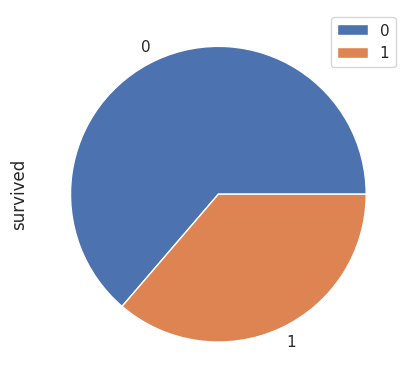

In [ ]:
# see if the titanic survived (target) is balanced
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.pie(labels=['0', '1']).legend();

In [ ]:
print(X_train.shape, X_test.shape)

(981, 9) (328, 9)


In [ ]:
# we can now build our titanic classification model
# is it balanced? no, use class_weight='balanced'
# is it a small dataset? yes, use liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

rocauc_score = roc_auc_score(y_test, predictions)

print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')

# what is our accuracy? (tn + tp / (total length of our data))
print(f'Test Accuracy (tn + tp / (total length of our data)): {(tn + tp) / (tn + fp + fn + tp)}')
print(f'Roc-Auc Score: {rocauc_score}')

print()
print(confusion_matrix(y_test, predictions))

Training Score: 0.7798165137614679
Test Score: 0.7926829268292683
Test Accuracy (tn + tp / (total length of our data)): 0.7926829268292683
Roc-Auc Score: 0.7872886473429952

[[153  31]
 [ 37 107]]


In [ ]:
# what features get the highest accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

# vt_keepers = np.array(['pclass' 'sex' 'age' 'sibsp' 'parch' 'embarked_S' 'cat_home_1'])
mi_keepers = np.array(['sex', 'pclass', 'parch', 'age'])
b3_keepers = np.array(['sex', 'age', 'pclass'])
# mt_keepers = np.array(['pclass' 'sex'])
cw_keepers = np.array(['sex', 'pclass'])
pc_keepers = np.array(['pclass'])
sx_keepers = np.array(['sex'])
am_keepers = np.array(['adult_male'])

k_list = {'variance threshold': vt_keepers,
          'k best': kb_keepers,
          'recursive feature': rf_keepers,
          'mututal information': mi_keepers,
          'big 3': b3_keepers,
          'select from model': mt_keepers,
          'corrwith': cw_keepers,
          'pclass': pc_keepers,
          'sex': sx_keepers}

# keepers = mi_keepers.tolist()

train_scores= {}
test_scores = {}

for k, v in k_list.items():
    keepers = v.tolist()

    model = LogisticRegression(class_weight='balanced', solver='liblinear')
    model.fit(X_train[keepers], y_train)
    predictions = model.predict(X_test[keepers])

    print(f'{k}{keepers} Training Score: {model.score(X_train[keepers], y_train)}')
    print(f'{k}{keepers} Test Score: {model.score(X_test[keepers], y_test)}')
    train_scores[k] = model.score(X_train[keepers], y_train)
    test_scores[k] = model.score(X_test[keepers], y_test)
    print()

print(max(train_scores, key=train_scores.get))
print(max(test_scores, key=test_scores.get))

variance threshold['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S', 'cat_home_1'] Training Score: 0.7757390417940877
variance threshold['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S', 'cat_home_1'] Test Score: 0.7957317073170732

k best['pclass', 'sex', 'age', 'parch', 'state_freq', 'cat_home_1'] Training Score: 0.7777777777777778
k best['pclass', 'sex', 'age', 'parch', 'state_freq', 'cat_home_1'] Test Score: 0.801829268292683

recursive feature['pclass', 'sex', 'embarked_Q', 'embarked_S', 'cat_home_1'] Training Score: 0.7665647298674821
recursive feature['pclass', 'sex', 'embarked_Q', 'embarked_S', 'cat_home_1'] Test Score: 0.7591463414634146

mututal information['sex', 'pclass', 'parch', 'age'] Training Score: 0.7675840978593272
mututal information['sex', 'pclass', 'parch', 'age'] Test Score: 0.7957317073170732

big 3['sex', 'age', 'pclass'] Training Score: 0.7604485219164119
big 3['sex', 'age', 'pclass'] Test Score: 0.7957317073170732

select from model['pclass', 'sex

In [ ]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced', solver='liblinear')
am_train = saved_train1['adult_male'].values
am_test = saved_test1['adult_male'].values
model.fit(am_train.reshape(-1, 1), y_train)
predictions = model.predict(am_test.reshape(-1, 1))

print(f'Training Score: {model.score(am_train.reshape(-1, 1), y_train)}')
print(f'Test Score: {model.score(am_test.reshape(-1, 1), y_test)}')

Training Score: 0.7747196738022426
Test Score: 0.7865853658536586


### Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent')
print('''
                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP
''')

Confusion Matrix
[[154  30]
 [ 40 104]]

Here is what the numbers represent

                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP



### Cross Validation and Grid Search

The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a hold-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

## Cross Validation

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

## Hyperparameter

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training. Hyperparameters can be classified as model hyperparameters, that cannot be inferred while fitting the machine to the training set because they refer to the model selection task, or algorithm hyperparameters, that in principle have no influence on the performance of the model but affect the speed and quality of the learning process.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

hyperparameters = {
            'penalty': ['l2', 'l1', 'elasticnet'],
            'C': np.logspace(-4, 4, 10),
            'fit_intercept': [True, False],
            'class_weight': ['balanced', 'None'],
            'solver': ['lbfgs', 'liblinear', 'newton-cholesky']
            }

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.7797876726448154
best parameters {'C': 0.046415888336127774, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import accuracy_score

model = LogisticRegression().set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7804878048780488
[[161  23]
 [ 49  95]]


### Pipeline

https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

In [ ]:
import sqlite3
import pandas as pd

db_connection = sqlite3.connect('/content/drive/MyDrive/DTSC5502/Module 09/titanic.db')

titanic = pd.read_sql_query('SELECT * FROM titanic', db_connection)
titanic = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'survived']]
titanic.drop(index=1309, inplace=True)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   embarked  1307 non-null   object 
 6   survived  1309 non-null   float64
dtypes: float64(5), object(2)
memory usage: 71.7+ KB
None


In [ ]:
# set up pipes and transformers
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config

# separate numerical and categorical data
num_feats = titanic.drop('survived', axis=1).select_dtypes(include='float64').columns.tolist()
cat_feats = titanic.select_dtypes(include='object').columns.tolist()

num_pipe = Pipeline(steps=[
                     ('impute', SimpleImputer(strategy='mean')),
                     ('scale', StandardScaler())
                     ])

cat_pipe = Pipeline(steps=[
                    ('impute', SimpleImputer(strategy='most_frequent')),
                    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                    ])

col_trans = ColumnTransformer(transformers=[
                    ('num_pipe', num_pipe, num_feats),
                    ('cat_pipe', cat_pipe, cat_feats)],
                    remainder='drop'
                    )

model = LogisticRegression(class_weight='balanced', solver='liblinear')
pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', model)
])

set_config(display='diagram')
display(pipe)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'embarked'])])),
                ('model',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [ ]:
# train test split and fit and score
from sklearn.model_selection import train_test_split

col_names=num_feats+cat_feats
X=titanic[col_names]
y=titanic['survived']
pX_train, pX_test, py_train, py_test = train_test_split(
                                X,
                                y,
                                test_size=0.25)

pipe.fit(pX_train, py_train)
print('Training score:', pipe.score(pX_train, py_train))
print('Testing score:', pipe.score(pX_test, py_test))

Training score: 0.7777777777777778
Testing score: 0.7682926829268293


In [ ]:
# find best parameters - https://www.freecodecamp.org/news/machine-learning-pipeline/
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

hyperparameters = {
            'model__penalty': ['l1', 'l2'],
            'model__C': np.logspace(-4, 4, 20)
            }

grid_search = GridSearchCV(pipe,
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(pX_train, py_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.7747474747474747
best parameters {'model__C': 0.08858667904100823, 'model__penalty': 'l1'}


### Underfitting / Overfitting

* Test scores higher than training scores? Underfitting if large, not using all of the signal in your data
* Train scores higher than test scores? Overfitting if large, memorizing data

### Bias / Variance

Variance: Captures how much your classifier changes if you train on a different training set. How "over-specialized" is your classifier to a particular training set (overfitting)? If we have the best possible model for our training data, how far off are we from the average classifier?

Bias: What is the inherent error that you obtain from your classifier even with infinite training data? This is due to your classifier being "biased" to a particular kind of solution (e.g. linear classifier). In other words, bias is inherent to your model.

Noise: How big is the data-intrinsic noise? This error measures ambiguity due to your data distribution and feature representation. You can never beat this, it is an aspect of the data.

* https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html
* https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html
* https://www.cs.cornell.edu/courses/cs4780/2018fa/

In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

<img src='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg' alt='bias variance tradeoff' />

Please read the article responsible for the image:

https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

### Training Testing Errors Example

$E[(\hat{y} - y)^2] = E[(\hat{y} - E[\hat{y})^2] + (E[\hat{y}] - y)^2$
<br />MSE = Variance + Bias^2
* where y = given y, (ground truth)
* $\hat{y}$ = prediction
* $E[\hat{y}]$ = expected value or average of predictions
* error = $\frac{fp + fn}{total}$
* Bias = error in training, hi error in both training and testing
* Variance = range of predictions on test dataset, how much an estimate of the target function will change if different data was is, high variance - high test error
* Low Bias and High Variance = Overfitting
* High Bias = Underfitting

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

<table width='50%' style='margin-right: 100%'>
    <tr>
        <td>Training Error</td>
        <td>1%</td>
        <td>15%</td>
        <td>16%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td>Testing Error</td>
        <td>15%</td>
        <td>16%</td>
        <td>28%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td></td>
        <td>lo bias</td>
        <td>hi bias</td>
        <td>hi bias</td>
        <td>lo bias</td>
    </tr>
    <tr>
        <td></td>
        <td>hi var</td>
        <td>lo var</td>
        <td>hi var</td>
        <td>lo var</td>
    </tr>
</table>

* https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/
* https://www.bmc.com/blogs/bias-variance-machine-learning/

To summarize, in this article, we learned that an ideal model would be one where both the bias error and the variance error are low. However, we should always aim for a model where the model score for the training data is as close as possible to the model score for the testing data.

That’s where we figured out how to choose a model that is not too complex (High variance and low bias) which would lead to overfitting and nor too simple(High Bias and low variance) which would lead to underfitting.

* https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/
* https://medium.com/analytics-vidhya/a-simple-guide-to-bias-variance-trade-off-part-1-2418229c78e0

### The Classification Report

The titanic wasn't as balanced but to appreciate the implications of an imbalanced dataset, consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [ ]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[161  23]
 [ 49  95]]
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       184
         1.0       0.81      0.66      0.73       144

    accuracy                           0.78       328
   macro avg       0.79      0.77      0.77       328
weighted avg       0.78      0.78      0.78       328



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print('precision 0:', round(tn/(tn+fn), 2))
print('precision 1:', round(tp/(tp+fp), 2))
print('recall 0:', round(tn/(tn+fp), 2))
print('recall 1:', round(tp/(tp+fn), 2))

161 23 49 95
precision 0: 0.77
precision 1: 0.81
recall 0: 0.88
recall 1: 0.66


We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

### Precision / Recall

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become useful metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GM10sFuFBAbhwBt2scuP1g.png' alt='precision recall tradeoff' />

https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140

* Precision - What did you correctly predict?
* Recall - What did you correctly identify from the acutal data?
* F1 (harmonic mean) - (2x(RecallxPrecision))/(Recall+Precision)

### ROC AUC Threshold

#### ROC Curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is the plot of the true positive rate against the false positive rate, at various threshold settings.

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

#### ROC AUC Score

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20ROC%20AUC%20score%20tells,and%20the%20Negative%20class%20points.

#### Youden's J (index)

The Youden index J is the point on the ROC curve which is farthest from the line of equality (diagonal line). The main aim of the Youden index is to maximize the difference between TPR (sn) and FPR (1 — sp).

https://medium.com/analytics-vidhya/roc-curve-classification-metrics-why-metrics-cant-replace-your-common-sense-e82d71c12eb3

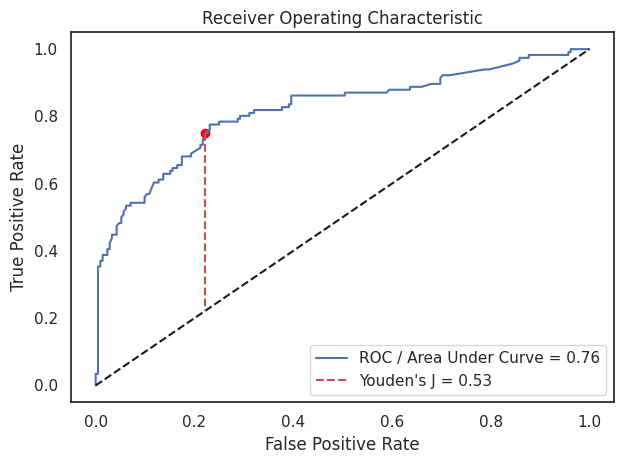

In [ ]:
# plot ROC, and Youden's J
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import math

predictions = pipe.predict(pX_test)
tn, fp, fn, tp = confusion_matrix(py_test, predictions).ravel()

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist


optimum_fpr = fp/(tn+fp)
optimum_tpr = tp/(fn+tp)

logit_roc_auc = roc_auc_score(py_test, predictions)
fpr, tpr, thresholds = roc_curve(py_test, pipe.predict_proba(pX_test)[:,1])
plt.plot(fpr, tpr, label='ROC / Area Under Curve = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.scatter(optimum_fpr, optimum_tpr, c='red')
plt.plot([optimum_fpr, optimum_fpr], [optimum_tpr, optimum_fpr], 'r--', label='Youden\'s J = %0.2f'
         % calculateDistance(optimum_fpr, optimum_fpr, optimum_tpr, optimum_fpr))
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()

### Power (Sensitivity) vs. Confidence (Specificity)

* Sensitivity (true positive rate): is the probability of a positive test result, conditioned on the individual truly being positive (predicting 0 when it is 0)
* Specificity (true negative rate): is the probability of a negative test result, conditioned on the individual truly being negative (predicting 1 when it is 1)

https://en.wikipedia.org/wiki/Sensitivity_and_specificity


<pre>
                    predicted
                   |   0   |  1     
           -----------------------   ----------------------------------------------
           0       |  {tn} |  {fp}   tnr (specificity)   |  fpr (type I error)
  actual   -----------------------   ----------------------------------------------
           1       |  {fn} |  {tp}   fnr (type II error) |  tpr (sensitivity)

                      npv  | fdr
           -----------------------
                      for  | ppv

</pre>

https://en.wikipedia.org/wiki/False_positives_and_false_negatives

* Type I Error: $\alpha$
* Type II Error: $\beta$
* Beta is directly related to the power of a test. Power relates to how likely a test is to distinguish an actual effect from one you could expect to happen by chance alone. Beta plus the power of a test is always equal to 1. Usually, researchers will refer to the power of a test (e.g. a power of .8), leaving the beta level (.2 in this case) as implied. https://www.statisticshowto.com/beta-level/
* The statistical power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis $H_{0}$ when a specific alternative hypothesis $H_{a}$ is true. It is commonly denoted by $1-\beta$ , and represents the chances of a "true positive" detection conditional on the actual existence of an effect to detect. Statistical power ranges from 0 to 1, and as the power of a test increases, the probability $\beta$  of making a type II error by wrongly failing to reject the null hypothesis decreases. https://en.wikipedia.org/wiki/Power_of_a_testHypothesis testing.

### Hypothesis testing

α (Alpha) is the probability of Type I error in any hypothesis test–incorrectly rejecting the null hypothesis.

β (Beta) is the probability of Type II error in any hypothesis test–incorrectly failing to reject the null hypothesis.  (1 – β is power).

### Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
  

## Acitivity Summary